In [15]:
# Step 1: Import packages and classes
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import  matplotlib.pyplot as plt
import pandas as pd

#using diabetes dataset from sklearn
diabetes_ds = datasets.load_diabetes()

In [16]:
#convert into pandas dataframe to visualise
df = pd.DataFrame(diabetes_ds.data, columns=diabetes_ds.feature_names)
df['target'] = pd.Series(diabetes_ds.target)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [17]:
# Step 2: Feed data

#x variables
column='age'
diabetes_ds.data[0]
X = df[column].values.reshape((-1,1))

#y variable
diabetes_ds.target
y = df['target']

#splitting data into datasets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.array(X_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print('X-Train -shape of input features for training', X_train.shape)
print('X-Test -shape of input features for training', x_test.shape)


X-Train -shape of input features for training (353, 1)
X-Test -shape of input features for training (89, 1)


In [18]:
# Step 3: Create model and fit training dataset
lnreg = linear_model.LinearRegression().fit(X_train,y_train)

In [19]:
# Step 4: Results
print('Co-efficient of linear regression',lnreg.coef_)
print('Intercept of linear regression model',lnreg.intercept_)

Co-efficient of linear regression [331.072172]
Intercept of linear regression model 153.2592015331949


In [20]:
# Step 5: Prediction
predictions = lnreg.predict(x_test)
print('Mean Square Error', metrics.mean_squared_error(y_test, predictions))
print('Model R^2 Square value', metrics.r2_score(y_test, predictions))

Mean Square Error 5254.231976236004
Model R^2 Square value 0.008289640305771506


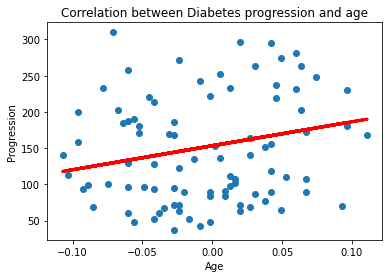

In [21]:
# Step 6: Visualisation
plt.scatter(x_test, y_test)
plt.plot(x_test, predictions, color='red', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Progression')
plt.title('Correlation between Diabetes progression and ' + column)
plt.show()